# Finite differences - introduction

The content of this topic is based on the amazing book **Finite Difference Computing with Exponential Decay Models**, which can be freely accessed as a [GitHub page](https://hplgit.github.io/decay-book/doc/web/index.html) or as a [book](http://link.springer.com/book/10.1007%2F978-3-319-29439-1) in the Springer series Lecture Notes in Computational Science and Engineering. This seminal work is authored by [Professor Hans Petter Langtangen](http://hplgit.github.io/homepage/index.html).

This book uses an ordinary differential equation <a href="https://en.wikipedia.org/wiki/Ordinary_differential_equation"><sup>[1]</sup></a> <a href="http://mathworld.wolfram.com/OrdinaryDifferentialEquation.html"><sup>[2]</sup></a> <a href="http://tutorial.math.lamar.edu/Classes/DE/DE.aspx"><sup>[3]</sup></a> describing an [exponential decay process](https://en.wikipedia.org/wiki/Exponential_decay) to illustrate fundamental concepts in mathematics and computer science.

## Exponential decay equation

Consider a function $u(t)$ satisfying the following ordinary differential equation (EDO):

$u^{\prime}(t) = -\alpha \, u(t) \: , \quad t > 0 \: ,$

where $u(t) > 0$, $u^{\prime}(t) \equiv \frac{d \, u(t)}{d \, t}$, and $\alpha$ is a positive constant. This equation decribes phenomena where some quantity undergoes exponential reduction with time. The figure below presents a geometrical interpratation of this EDO.

In [1]:
from IPython.display import Image as img

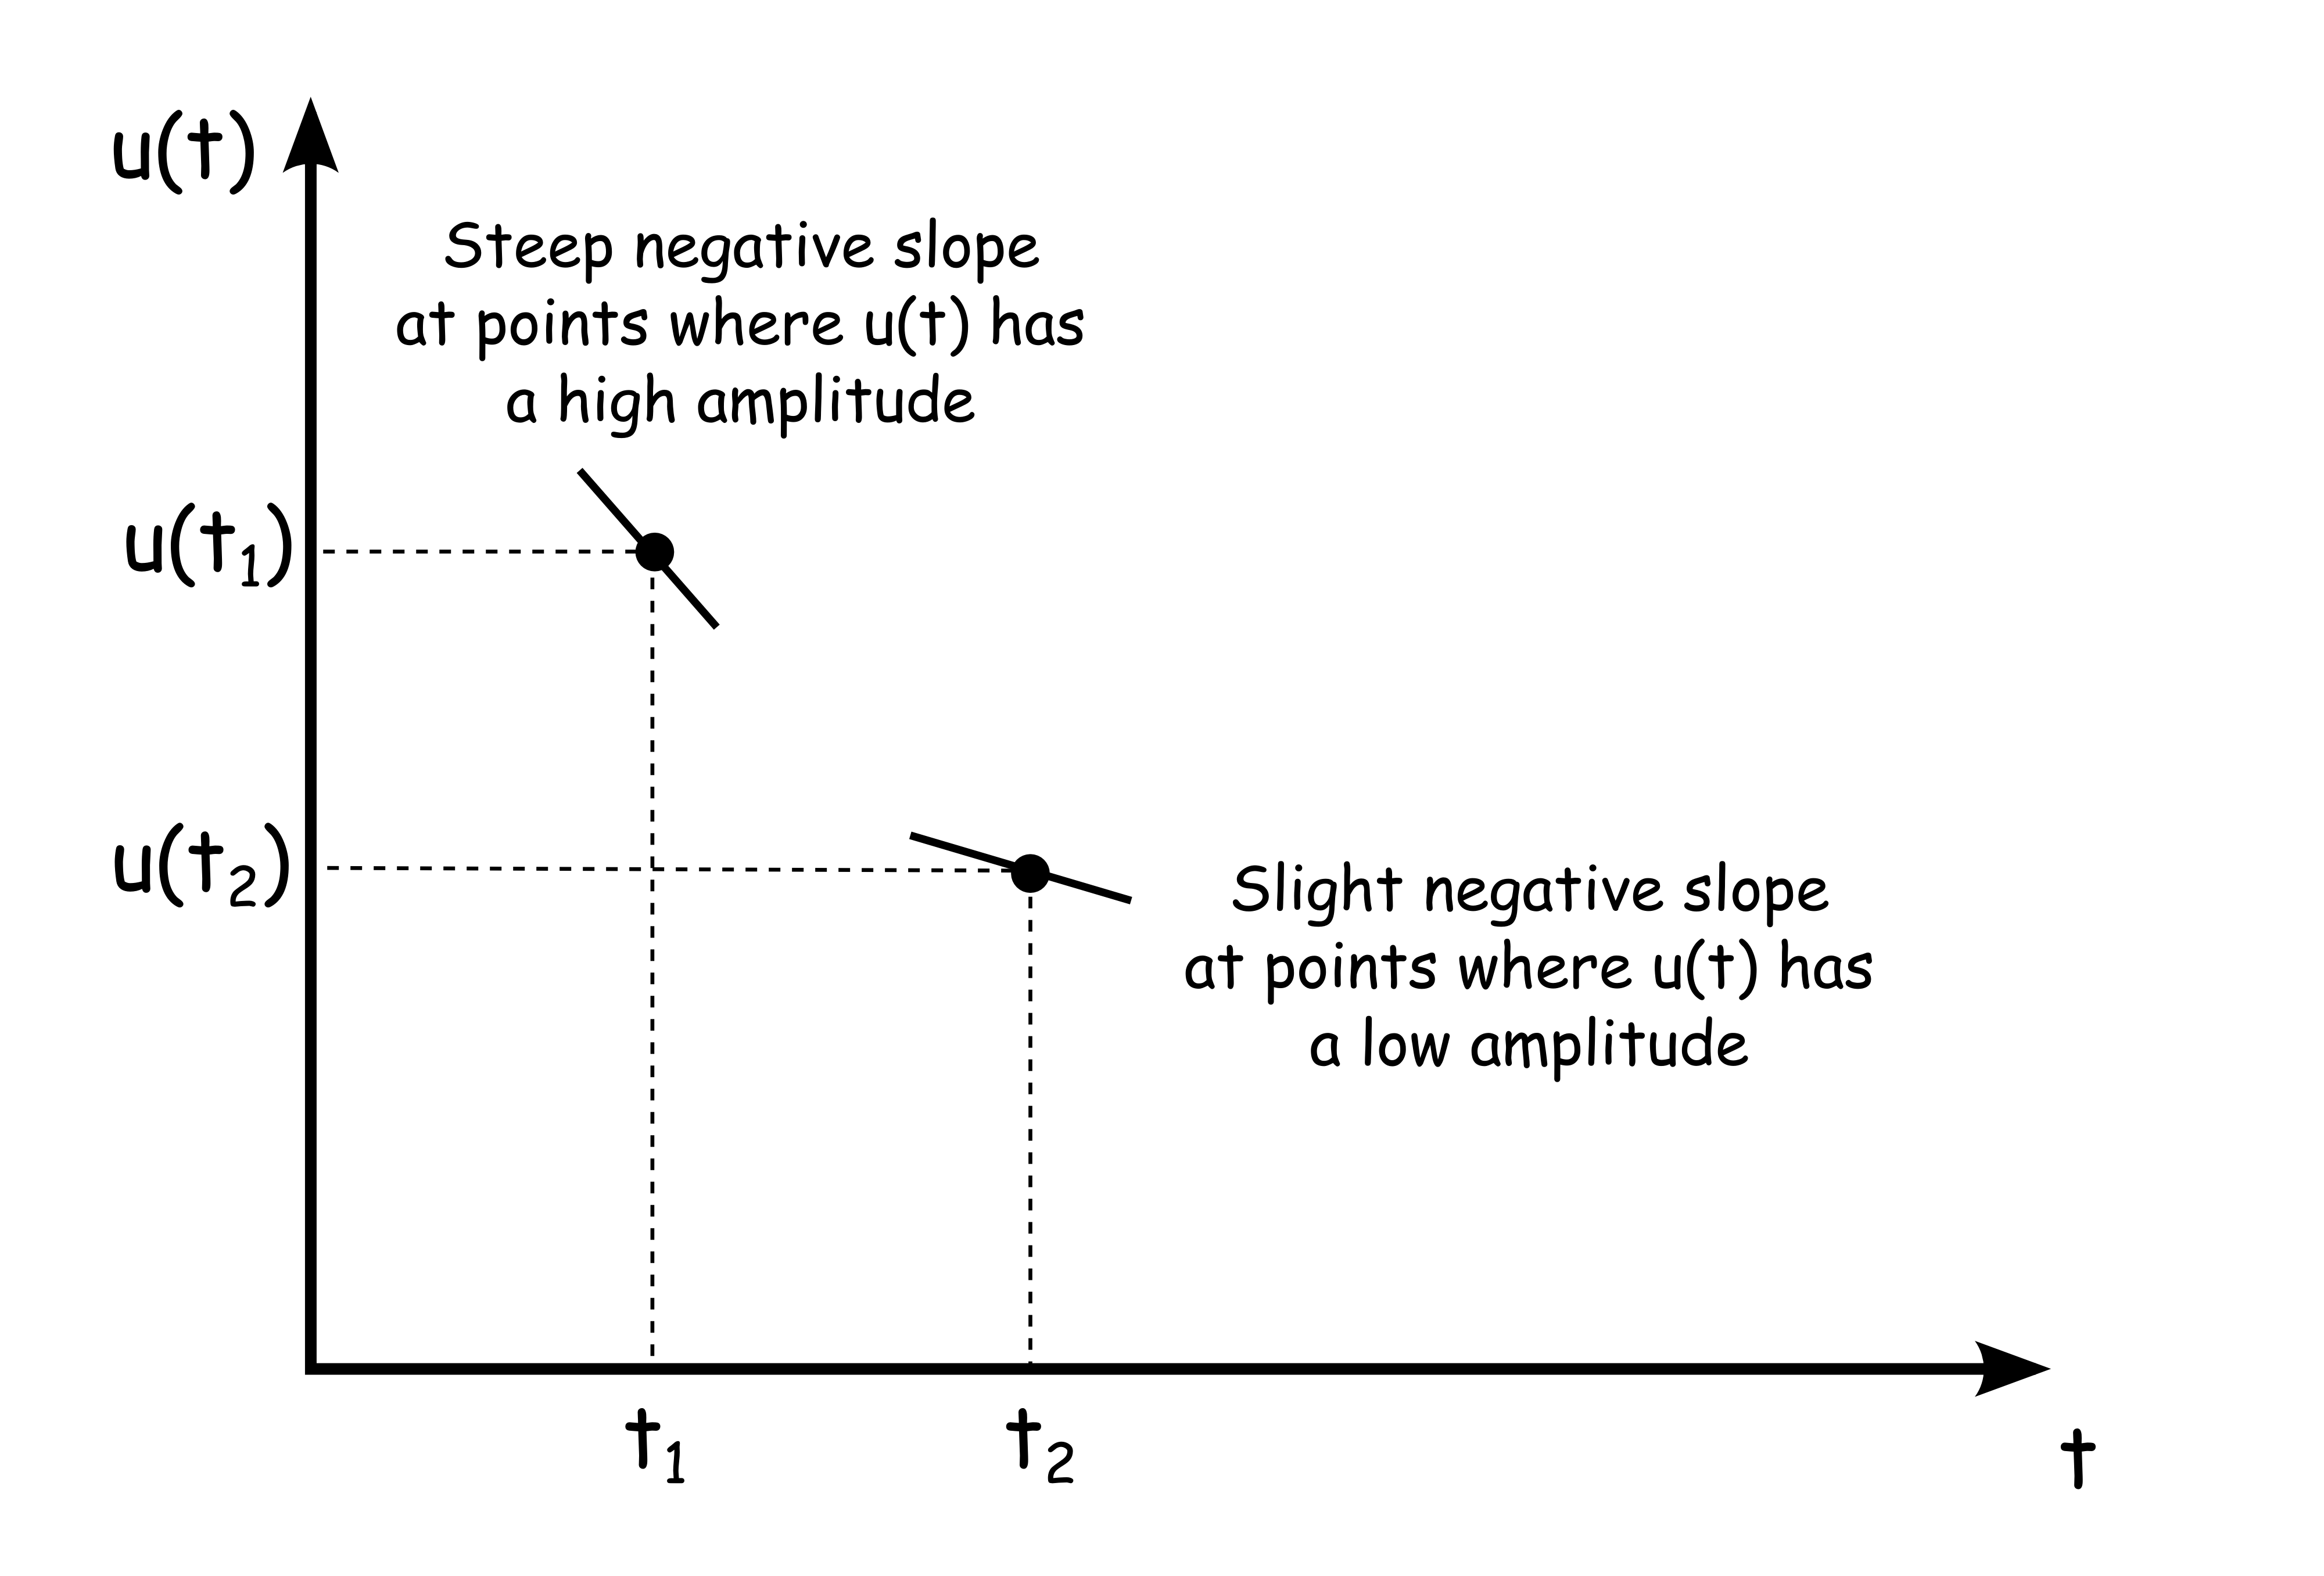

In [2]:
img('fd/exponential_decay.png', width=600)

The slope of the function $u(t)$ is represented by its first derivative $u^{\prime}(t)$. According to this equation, the ratio $\frac{u^{\prime}(t)}{u(t)}$ is equal to $-\alpha$ for any $t$, where $\alpha$ is a positive constant.

## Exact solution

Consider that the function $u(t)$ has the following form:

$$
u(t) = C \, e^{\, \lambda \, t} \: ,
$$

where $C$ and $\lambda$ are non-null constants. In this case, we have:

$$
u^{\prime}(t) = \lambda \, C \, e^{\, \lambda \, t} \: .
$$

By substituting this equations into the EDO we obtain

$$
\underbrace{C \, e^{\, \lambda \, t}}_{\ne \, 0} \, (\lambda + \alpha) = 0 \: ,
$$

resulting that $\lambda = -\alpha$ and, consequently,

$$
u(t) = C \, e^{-\alpha \, t} \: .
$$

Now, we need to determine the constant $C$. This constant is obtained from the value that $u(t)$ assumes at $t = 0$, which is the *initial condition*. Consider the initial condition given below:

$$
u(0) = C_{0} \: ,
$$

where $C_{0}$ is a positive constant. Finally, by substituting this initial contidion into the EDO, it is easy to show that $C = C_{0}$ and, consequently, that

$$
u(t) = C_{0} \, e^{-\alpha \, t} \: .
$$

## Numerical solutions

While the exact solutions furnish one $u(t)$ for each one of the infinite $t > 0$, the numerical solutions furnish one value $u^{n}$ for each $t_{n}$, $n = 0, 1, \dots, N$, pertaining to a discrete set $\{t_{0}, t_{1}, \dots, t_{N}\}$. Each value $u^{n}$ represents an approximation of the function $u(t)$ evaluated at a point $t = t_{n}$,

### 1) Discretize the time domain

For simplicity, consider a discrete set of $N + 1$ points $t = t_{0}, t_{1}, \dots, t_{N}$ equally spaced at a constant $\Delta t$. In this case, a generic point $t_{n}$ is given by

$$
t_{n} = t_{0} + n \, \Delta t \: ,
$$

where $n = 0, 1, \dots, N$, $t_{0} = 0$ and $t_{N} = T$. A set of $N + 1$ equally spaced points varying from $0$ to $T$ can be easily generated by using the routine [`numpy.linspace`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).

### 2) Replace the derivatives by difference equations

The difference equations can be defined mathetically by using Taylor series <a href="http://hplgit.github.io/decay-book/doc/pub/book/sphinx/._book002.html#mathematical-derivation-of-finite-difference-formulas"><sup>[1]</sup></a> <a href="http://tutorial.math.lamar.edu/Classes/CalcII/TaylorSeries.aspx"><sup>[2]</sup></a> about a point $t$ :

$$
u(t + \Delta \, t) = u(t) + \sum \limits_{k = 1}^{\infty} 
\frac{1}{k!} \frac{d^{(k)} u(t)}{d \, t^{(k)}} \, (\Delta \, t)^{(k)} \: .
$$

#### 2.1) Forward difference approximation

By evaluating the Taylor series at $t_{n+1}$, where $t_{n+1} = t_{n} + \Delta \, t$, $\Delta \, t > 0$, and letting $\Delta \, t \to 0$, we obtain

$$
\frac{d \, u(t_{n})}{d \, t} \approx \frac{u(t_{n+1}) - u(t_{n})}{\Delta \, t} \: .
$$

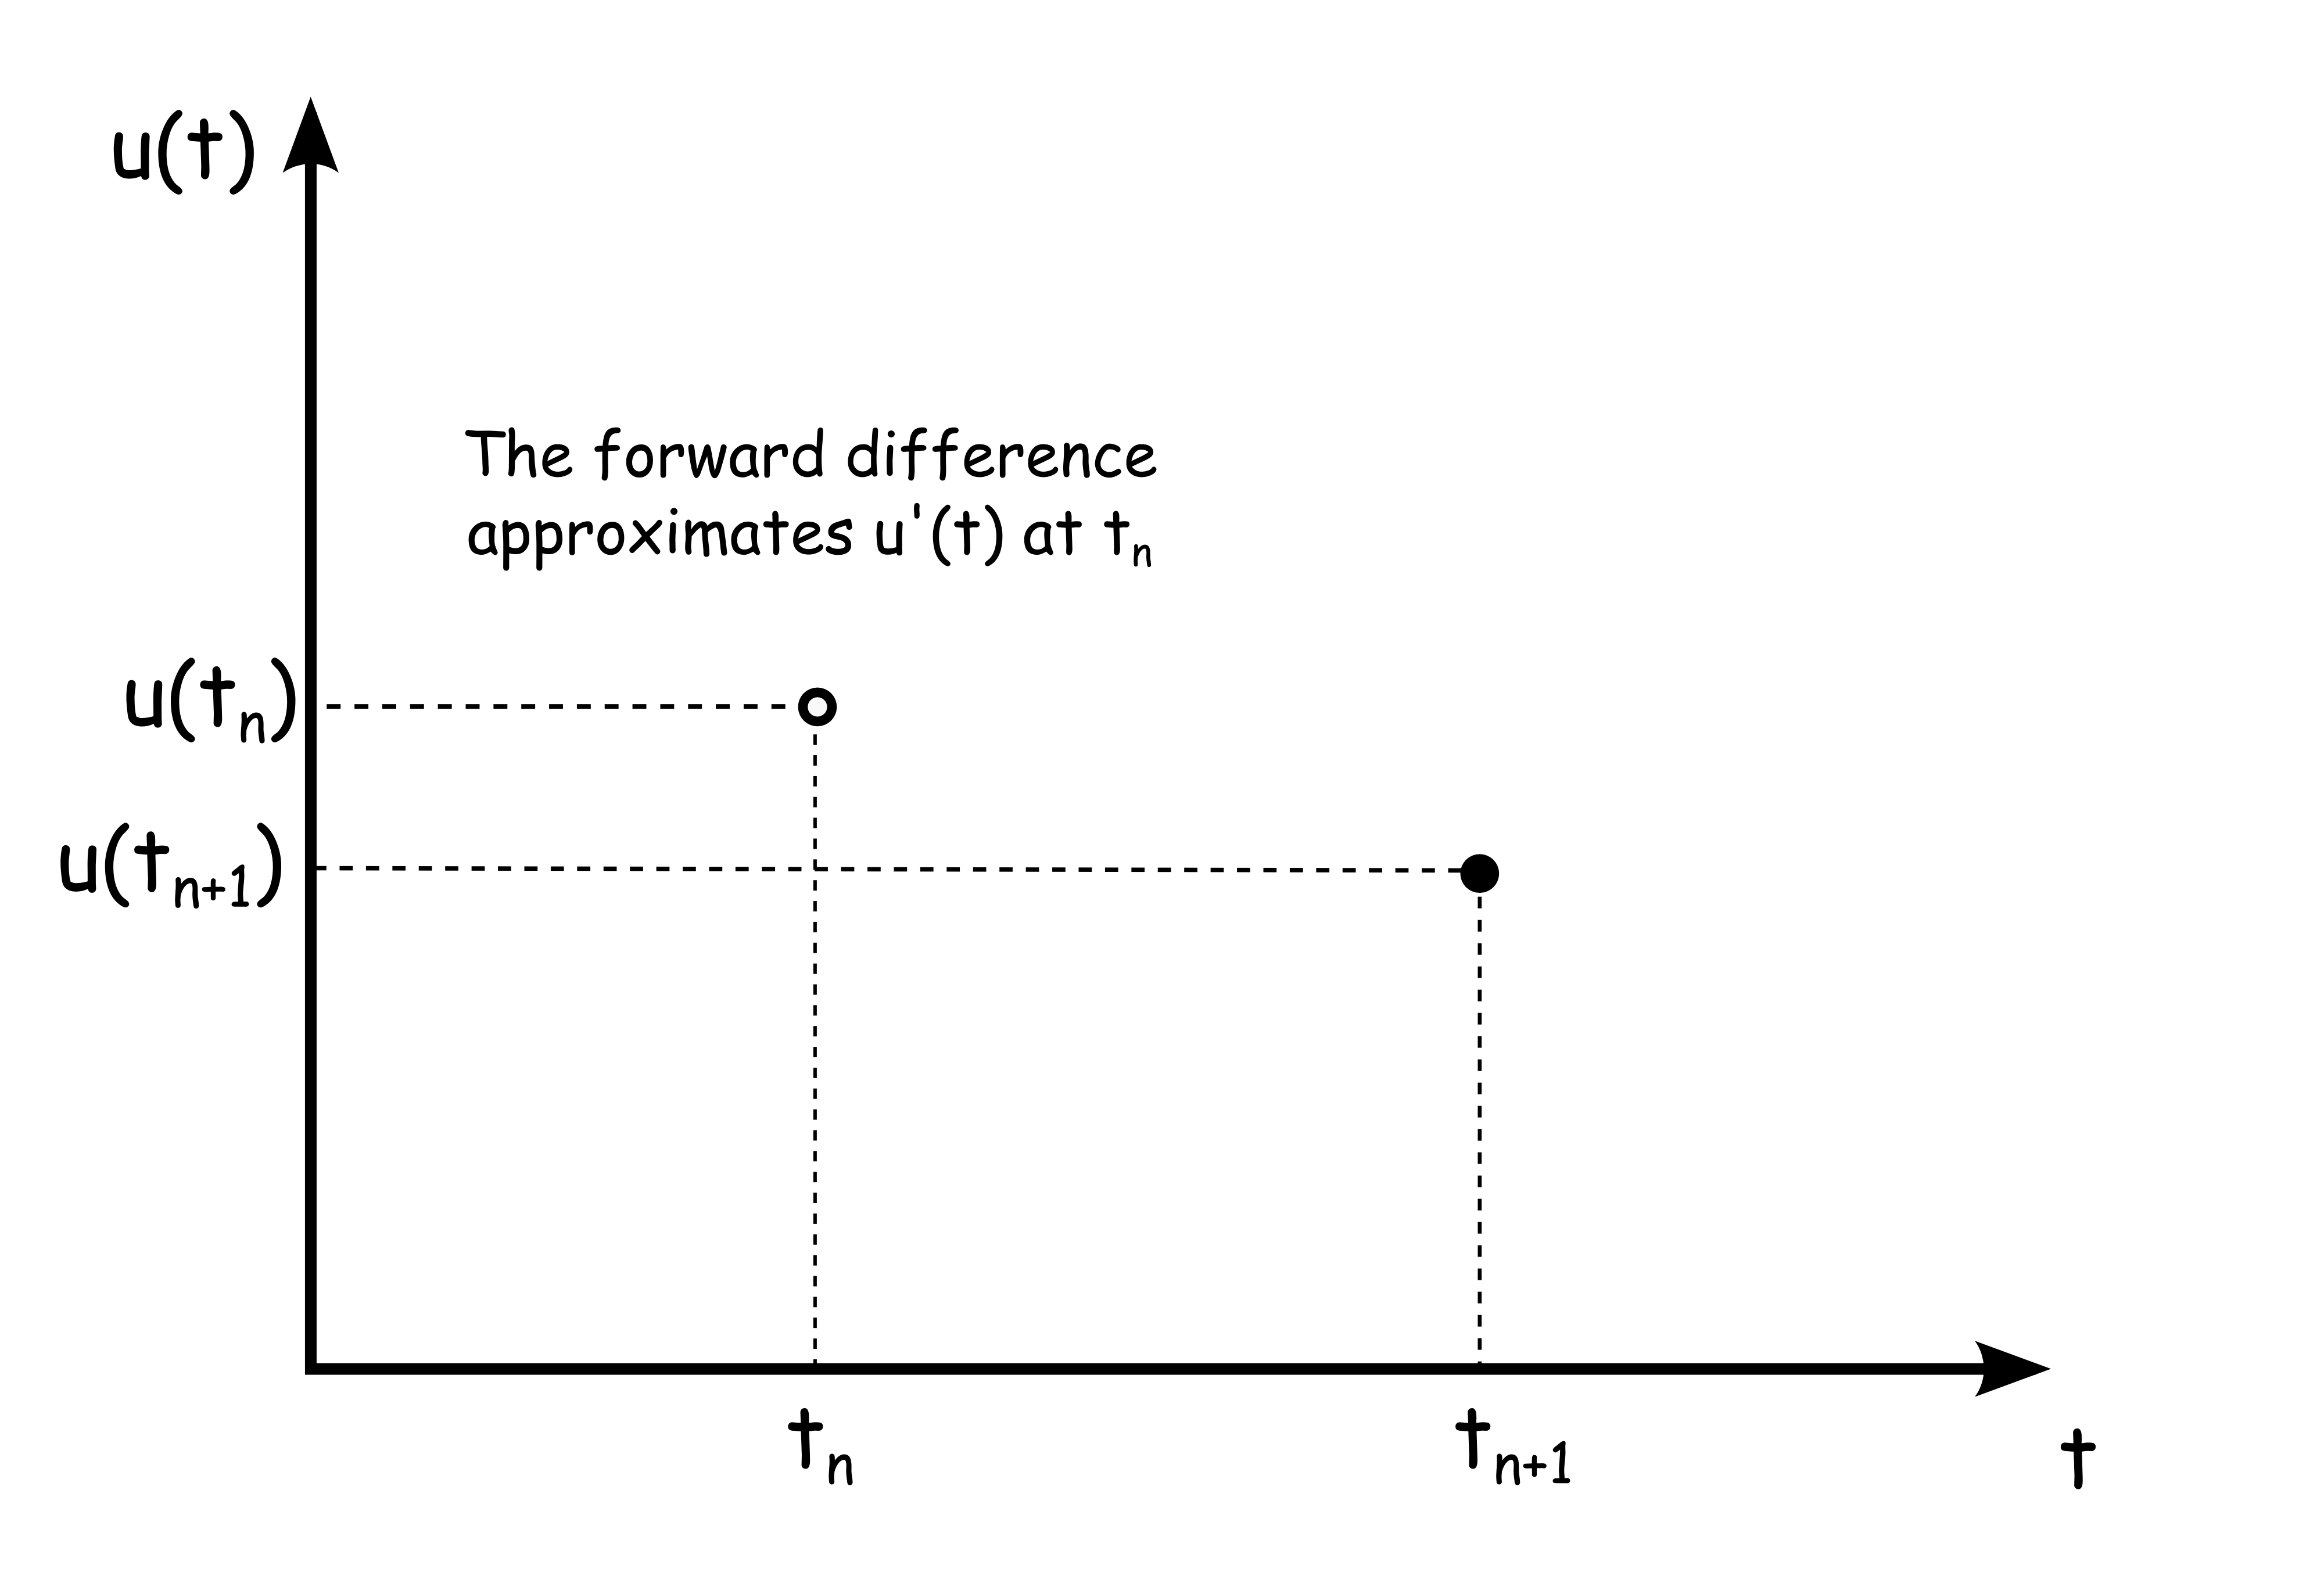

In [3]:
img('fd/forward_difference.png', width=600)

#### 2.2) Backward difference approximation

By evaluating the Taylor series at $t_{n-1}$, where $t_{n-1} = t_{n} - \Delta \, t$, $\Delta \, t > 0$, and letting $\Delta \, t \to 0$, we obtain

$$
\frac{d \, u(t_{n})}{d \, t} \approx \frac{u(t_{n}) - u(t_{n-1})}{\Delta \, t} \: .
$$

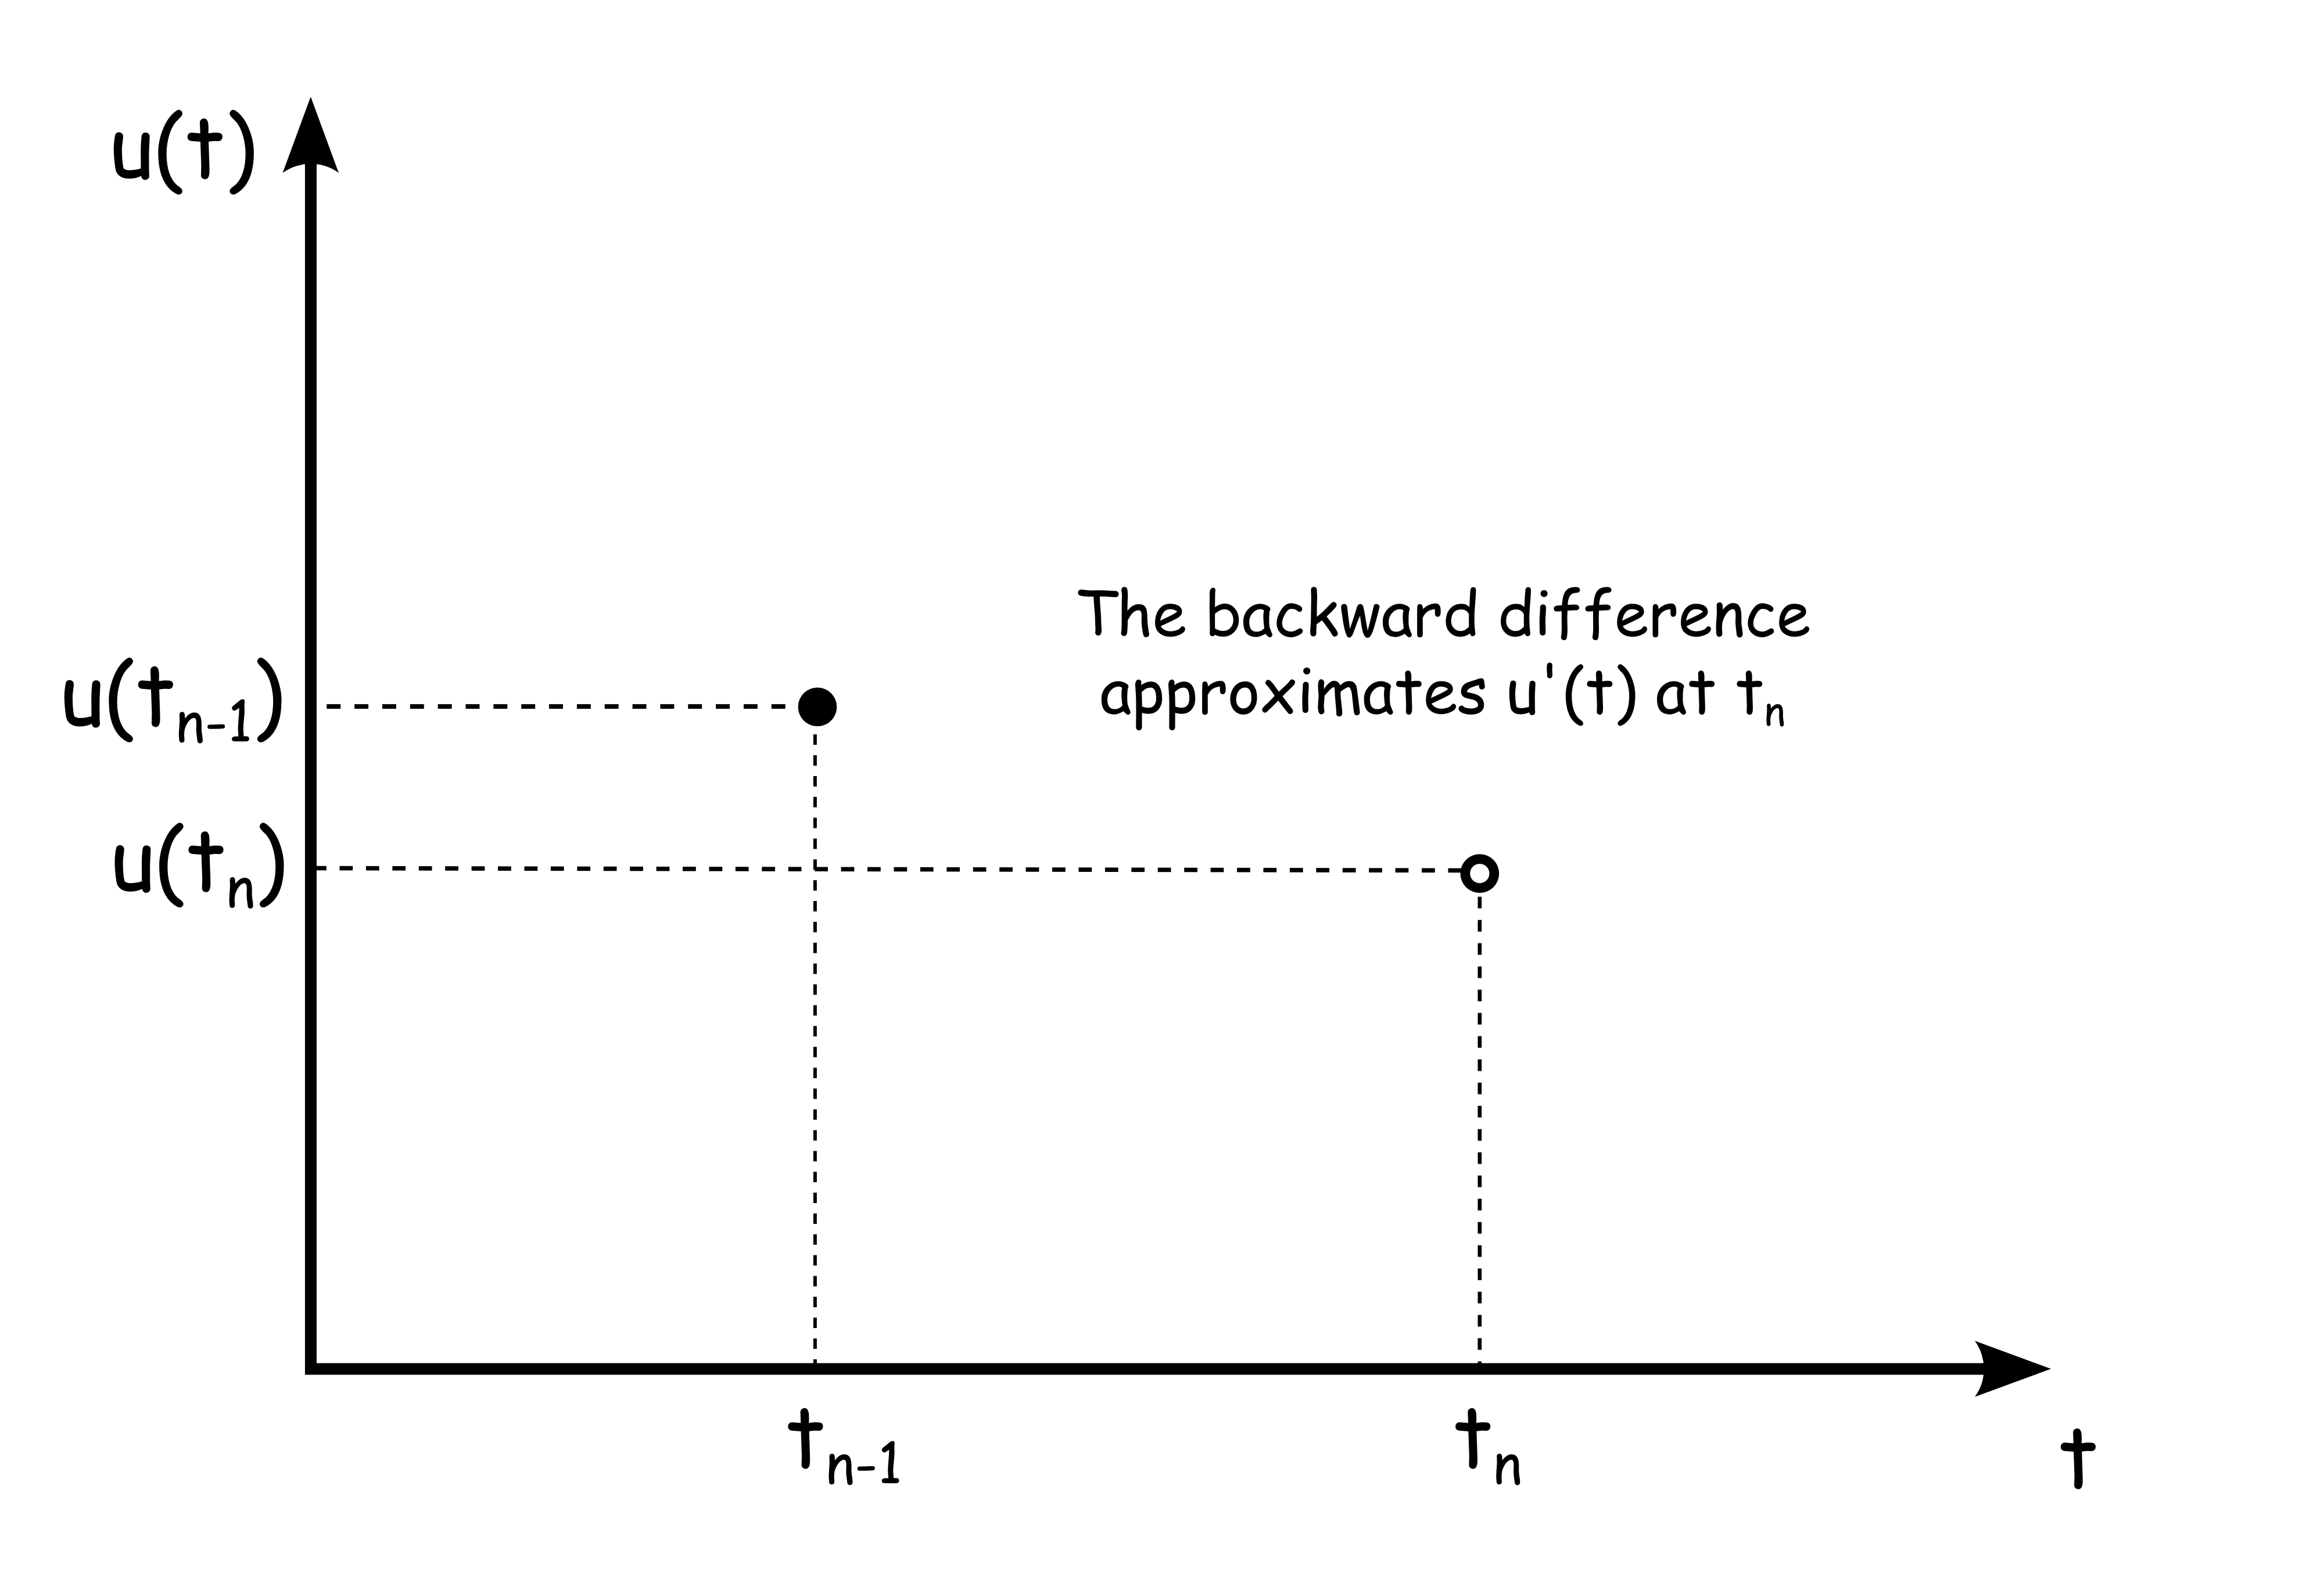

In [4]:
img('fd/backward_difference.png', width=600)

#### 2.3) Central difference approximation

First, evaluate the Taylor series at $t_{n}$, where

$$
t_{n} = \underbrace{\left( t_{n} + \frac{1}{2}\Delta \, t\right)}_{t_{0}} + \left(-\frac{1}{2}\Delta \, t\right) \: .
$$ 

Then, evaluate the Taylor series at $t_{n+1}$, where

$$
t_{n+1} = \underbrace{\left( t_{n} + \frac{1}{2}\Delta \, t\right)}_{t_{0}} + \left(\frac{1}{2}\Delta \, t\right) \: .
$$ 

Finally, by subtracting $t_{n}$ from $t_{n+1}$ and letting $\Delta \, t \to 0$, we obtain

$$
\frac{d \, u\left(t_{n} + \frac{1}{2}\Delta \, t\right)}{d \, t} \approx \frac{u(t_{n+1}) - u(t_{n})}{\Delta \, t} \: .
$$

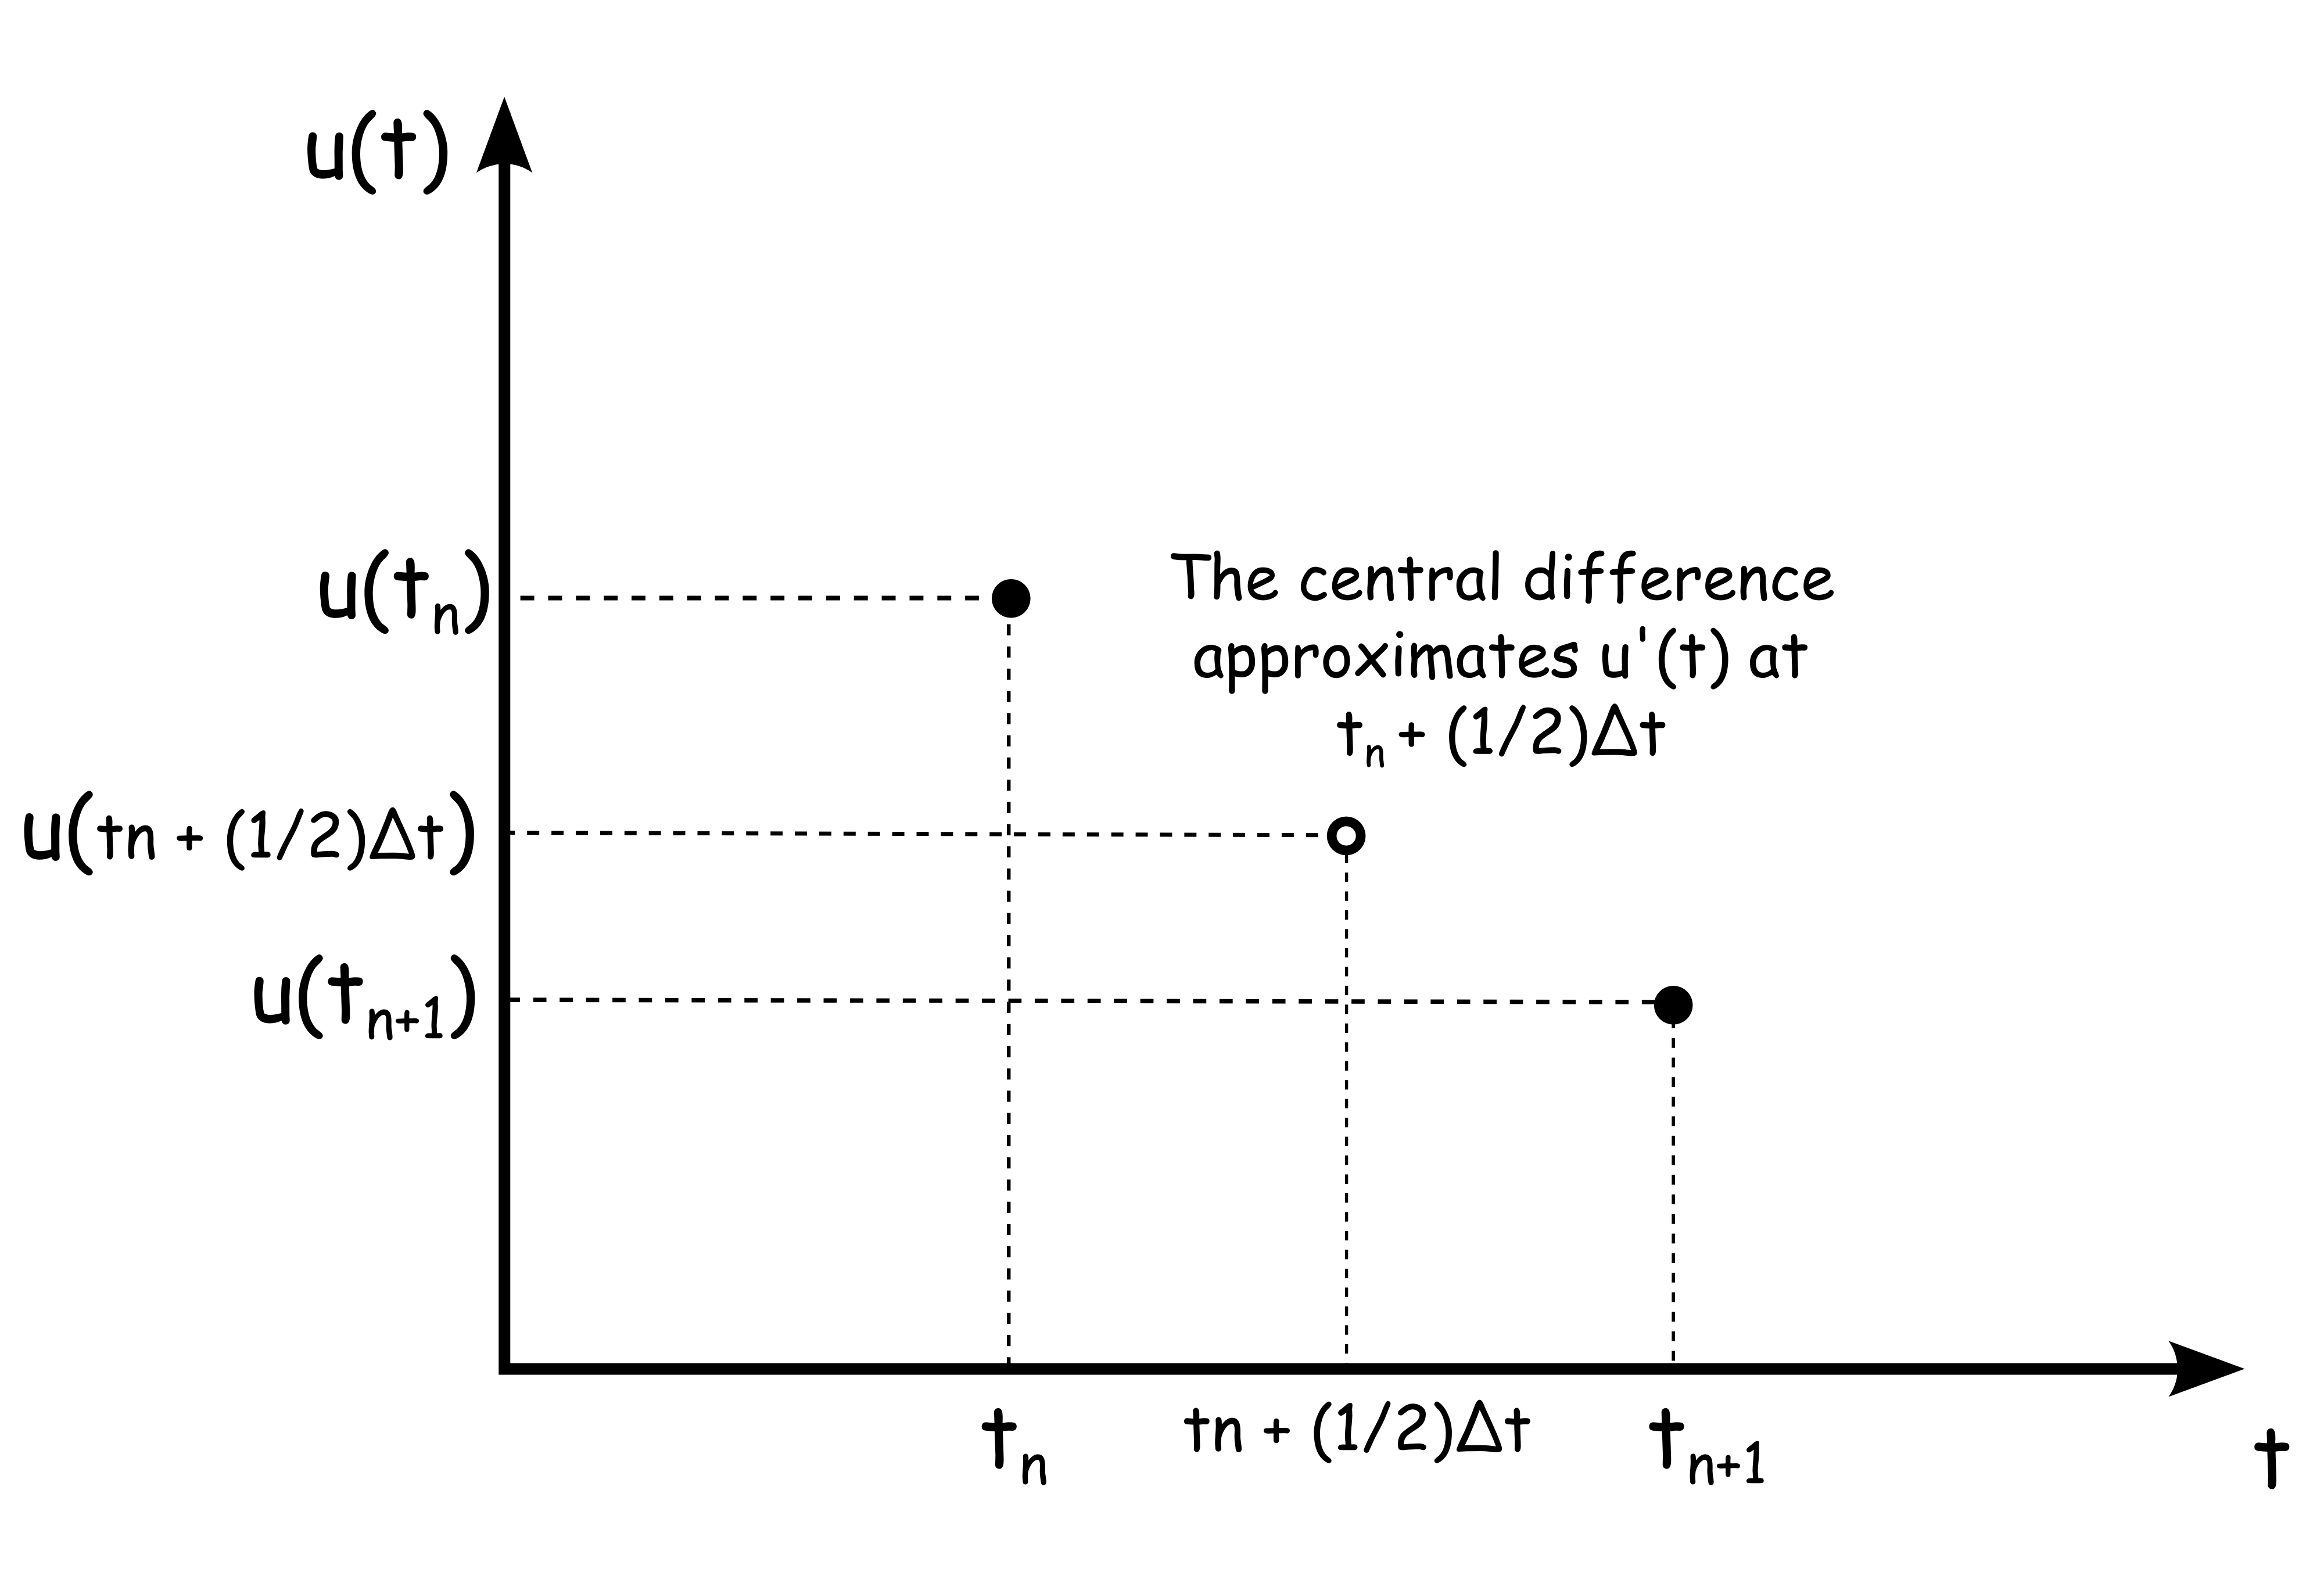

In [5]:
img('fd/central_difference.png', width=600)

### 3) Define the algorithm

#### 3.1) Forward Euler (FE) scheme

Evaluate the EDO at $t_{n}$

$$
u^{\prime}(t_{n}) = -\alpha \, u(t_{n}) \: .
$$

Replace the derivative by the forward difference approximation and write $u^{n+1}$ as a function of $u^{n}$

$$
u^{n+1} = \left(1 - \alpha \, \Delta \, t \right) \, u^{n} \: .
$$

The algorithm is given by:

$$
\begin{split}
u^{0} &= C_{0} \\
u^{1} &= u^{0} &\left(1 - \alpha \, \Delta \, t \right) \\
u^{2} &= u^{0} &\left(1 - \alpha \, \Delta \, t \right)^{2} \\
u^{3} &= u^{0} &\left(1 - \alpha \, \Delta \, t \right)^{3} \\
& \quad \vdots \\
u^{N} &= u^{0} &\left(1 - \alpha \, \Delta \, t \right)^{N}
\end{split}
$$

#### 3.2) Backward Euler (BE) scheme

Evaluate the EDO at $t_{n}$

$$
u^{\prime}(t_{n}) = -\alpha \, u(t_{n}) \: .
$$

Replace the derivative by the backward difference approximation and write $u^{n+1}$ as a function of $u^{n}$

$$
u^{n} = \frac{1}{\left(1 + \alpha \, \Delta \, t \right)} \, u^{n-1} \: ,
$$

which is equivalent to

$$
u^{n+1} = \frac{1}{\left(1 + \alpha \, \Delta \, t \right)} \, u^{n} \: .
$$

The algorithm is given by:

$$
\begin{split}
u^{0} &= C_{0} \\
u^{1} &= u^{0} &\frac{1}{\left(1 + \alpha \, \Delta \, t \right)} \\
u^{2} &= u^{0} &\frac{1}{\left(1 + \alpha \, \Delta \, t \right)^{2}} \\
u^{3} &= u^{0} &\frac{1}{\left(1 + \alpha \, \Delta \, t \right)^{3}} \\
& \quad \vdots \\
u^{N} &= u^{0} &\frac{1}{\left(1 + \alpha \, \Delta \, t \right)^{N}}
\end{split}
$$

#### 3.3) Crank-Nicolson (CN) scheme

Evaluate the EDO at $t_{n} + \frac{1}{2} \Delta \, t$

$$
u^{\prime} \left( t_{n} + \frac{1}{2} \Delta \, t \right) = -\alpha \, u \left( t_{n} + \frac{1}{2} \Delta \, t \right) \: .
$$

Replace the derivative by the central difference approximation

$$
\frac{u^{n+1} - u^{n}}{\Delta \, t} = -\alpha u^{\, n + \frac{1}{2}} \: ,
$$

where $u^{\, n + \frac{1}{2}} \approx u \left( t_{n} + \frac{1}{2} \Delta \, t \right)$.

Approximate $u^{\, n + \frac{1}{2}}$ by the average of $u^{n}$ and $u^{n+1}$

$$
u^{n + \frac{1}{2}} = \frac{1}{2} \left( u^{n} + u^{n+1} \right) \: .
$$

Finally, replace this result into the previous equation and write $u^{n+1}$ as a function of $u^{n}$

$$
u^{n+1} = \frac{\left(1 - \frac{1}{2}\alpha \, \Delta \, t \right)}{\left(1 + \frac{1}{2}\alpha \, \Delta \, t \right)} \, u^{n} \: .
$$

The algorithm is given by:

$$
\begin{split}
u^{0} &= C_{0} \\
u^{1} &= u^{0} &
\left[ \frac{\left(1 - \frac{1}{2}\alpha \, \Delta \, t \right)}{\left(1 + \frac{1}{2}\alpha \, \Delta \, t \right)} \right] \\
u^{2} &= u^{0} &
\left[ \frac{\left(1 - \frac{1}{2}\alpha \, \Delta \, t \right)}{\left(1 + \frac{1}{2}\alpha \, \Delta \, t \right)} \right]^{2}\\
u^{3} &= u^{0} &
\left[ \frac{\left(1 - \frac{1}{2}\alpha \, \Delta \, t \right)}{\left(1 + \frac{1}{2}\alpha \, \Delta \, t \right)} \right]^{3} \\
& \quad \vdots \\
u^{N} &= u^{0} &
\left[ \frac{\left(1 - \frac{1}{2}\alpha \, \Delta \, t \right)}{\left(1 + \frac{1}{2}\alpha \, \Delta \, t \right)} \right]^{N}
\end{split}
$$

#### 3.4) $\theta$-rule scheme

As in the CN scheme, evaluate the EDO at a point $\tilde{t}$ located between $t_{n}$ and $t_{n+1}$:

$$
u^{\prime} \left( \tilde{t} \right) = -\alpha \, u \left( \tilde{t} \right) \: .
$$

In the CN scheme, the point $\tilde{t}$ is given by:

$$
\begin{split}
\tilde{t} &= t_{n} + \frac{1}{2} \Delta \, t \\
&= t_{n} + \frac{1}{2} \left( t_{n+1} - t_{n} \right) \\
&= \frac{1}{2} \left( t_{n+1} + t_{n} \right)
\end{split} \: ,
$$

which represents the average of $t_{n}$ and $t_{n+1}$. By following the same strategy, $u \left( \tilde{t} \right)$ was approximated by the average of $u^{n}$ and $u^{n+1}$. Now, instead of using the average, let's use the [weighted arithmetic mean with normalized weights](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean). In this case,

$$
\tilde{t} = \left( \, 1 - \theta \, \right) \, t_{n} + \theta \, t_{n+1} \: ,
$$

where $\theta \in \left[ 0, 1 \right]$. similarly to the CN scheme, approximate $u \left( \tilde{t} \right)$ as follows:

$$
u \left( \tilde{t} \right) = \left( \, 1 - \theta \, \right) \, u^{n} + \theta \, u^{n+1} \: .
$$

Finally, by using this weighted arithmetic mean for $u \left( \tilde{t} \right)$ and the central difference approximation for the derivative, we obtain:

$$
u^{n+1} = \frac{\left[1 - \left( \, 1 - \theta \, \right) \alpha \, \Delta \, t \right]}{\left(1 + \theta \, \alpha \, \Delta \, t \right)} \, u^{n} \: ,
$$.

which unifies the previous methods. Notice that $\theta = 0, \frac{1}{2}$, and $1$ represent, respectively, the FE, CN, and BE schemes. Moreover, the algorithm is similar to that of CN scheme. The difference is the use of a constant factor $\frac{\left[1 - \left( \, 1 - \theta \, \right) \alpha \, \Delta \, t \right]}{\left(1 + \theta \, \alpha \, \Delta \, t \right)}$ instead of $\frac{\left(1 - \frac{1}{2}\alpha \, \Delta \, t \right)}{\left(1 + \frac{1}{2}\alpha \, \Delta \, t \right)}$.

### 4) Computational implementation

Given `C0` (initial condition), `alpha` (positive coefficient of the EDO), `T` (maximum mesh point), `N` (positive integer controlling the number of mesh points), and `theta` (parameter $\theta$), it is possible to calculate a 1D array `u` containing the $N+1$ estimated $u^{n}$ as follows:

    dt = (1.*T)/N # the '1.*' avoids floor division
    factor = (1. - (1.-theta)*alpha*dt)/(1. + theta*dt*alpha)
    u[0] = C0
    for n = 0:N
        u[n+1] = factor*u[n]

### 5) Testing the code

For specific input values (`C0`, `alpha`, `T`, `N`, `theta`), the three schemes presented here (FE, BE, and CN) generate the same result `u_test`. Let's consider, for example, a `u_test` given by:

$$
\begin{split}
u^{0}_{test} &= 1.0 \\
u^{1}_{test} &= 0.5 \\
u^{2}_{test} &= 0.5^{2} \\
u^{3}_{test} &= 0.5^{3} \\
& \: \: \vdots \\
u^{N}_{test} &= 0.5^{N}
\end{split}
$$

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [7]:
N = 40
u_test = np.zeros(N+1)
u_test[0] = 1.
u_test[1] = 0.5

for i in range(2,N+1):
    u_test[i] = 0.5*u_test[i-1]

In [8]:
print u_test

[  1.00000000e+00   5.00000000e-01   2.50000000e-01   1.25000000e-01
   6.25000000e-02   3.12500000e-02   1.56250000e-02   7.81250000e-03
   3.90625000e-03   1.95312500e-03   9.76562500e-04   4.88281250e-04
   2.44140625e-04   1.22070312e-04   6.10351562e-05   3.05175781e-05
   1.52587891e-05   7.62939453e-06   3.81469727e-06   1.90734863e-06
   9.53674316e-07   4.76837158e-07   2.38418579e-07   1.19209290e-07
   5.96046448e-08   2.98023224e-08   1.49011612e-08   7.45058060e-09
   3.72529030e-09   1.86264515e-09   9.31322575e-10   4.65661287e-10
   2.32830644e-10   1.16415322e-10   5.82076609e-11   2.91038305e-11
   1.45519152e-11   7.27595761e-12   3.63797881e-12   1.81898940e-12
   9.09494702e-13]


The specific input values needed for generating this result are:

1. `theta = 0.0`, `N = 40`, `T = 10`, `alpha = 2` (FE scheme)
2. `theta = 0.5`, `N = 40`, `T = 10`, `alpha = 8/3` (CN scheme)
3. `theta = 1.0`, `N = 40`, `T = 10`, `alpha = 4` (BE scheme)

Hence, one way of testing the code is using these specific input values and the routine [`numpy.allclose`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) for comparing the calculated `u` and `u_test`.

### Exercise 28a

1. Create a function for implementing the algorithm presented above. This function must receive C0, alpha, T, N, theta and return u (calculated function values) and t (mesh points).
2. Test the code by using the specific input values given above and the routine numpy.allclose.
3. Generate an exact solution according to the cell below. Generate three numerical solutions with your function, each one with a different theta representing the FE, BE and CN schemes. Plot a figure with the exact solution and the three numerical solutions produced by your function.

In [9]:
def exact(C0, alpha, t):
    return C0*np.exp(-alpha*t)

In [10]:
C0 = 1.
alpha = 4.

In [11]:
t_e = np.linspace(0., 10., 100)
u_e = exact(C0, alpha, t_e)

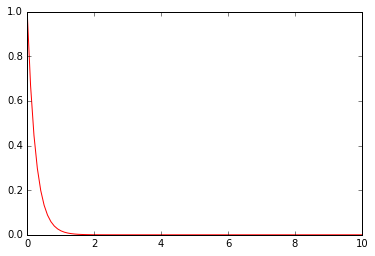

In [12]:
plt.close('all')
plt.figure()
plt.plot(t_e, u_e, '-r')
plt.show()